<a href="https://colab.research.google.com/github/ElaiEmylleMatos/challenge-telecom-x/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [12]:
url = 'https://raw.githubusercontent.com/ElaiEmylleMatos/challenge-telecom-x/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

## Desaninhando o json

In [13]:
customer = pd.json_normalize(dados['customer'])
phone = pd.json_normalize(dados['phone'])
internet = pd.json_normalize(dados['internet'])
account = pd.json_normalize(dados['account'])

df = dados.drop(['customer', 'phone', 'internet', 'account'], axis=1)

df = pd.concat([df, customer, phone, internet, account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Convertendo campos

In [15]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


'''
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
def toBoolean(valor):
    if valor == 'Yes':
        return True
    else:
        return False

df['Churn'] = df['Churn'].apply(toBoolean)
df['Partner'] = df['Partner'].apply(toBoolean)
df['Dependents'] = df['Dependents'].apply(toBoolean)
df['PhoneService'] = df['PhoneService'].apply(toBoolean)
df['MultipleLines'] = df['MultipleLines'].apply(toBoolean)
df['OnlineSecurity'] = df['OnlineSecurity'].apply(toBoolean)
df['OnlineBackup'] = df['OnlineBackup'].apply(toBoolean)
df['DeviceProtection'] = df['DeviceProtection'].apply(toBoolean)
df['TechSupport'] = df['TechSupport'].apply(toBoolean)
df['StreamingTV'] = df['StreamingTV'].apply(toBoolean)
df['StreamingMovies'] = df['StreamingMovies'].apply(toBoolean)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(toBoolean)
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Verificando valores inconsistentes

### Nan

In [16]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Valores inconsistentes

In [19]:
colunas = df.columns

for coluna in colunas:
    print(f'{coluna}: {df[coluna].unique()}')


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit

#📊 Carga e análise

In [20]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


In [21]:
df.describe(include='object')

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


In [22]:
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()
churn_by_gender

Churn,,No,Yes
gender,,,
Female,104,2544,939
Male,120,2619,930


In [23]:
churn_by_internet_service = df.groupby(['InternetService', 'Churn']).size().unstack()
churn_by_internet_service

Churn,,No,Yes
InternetService,,,
DSL,67,1957,459
Fiber optic,102,1799,1297
No,55,1407,113


In [24]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


KeyError: 'genero'

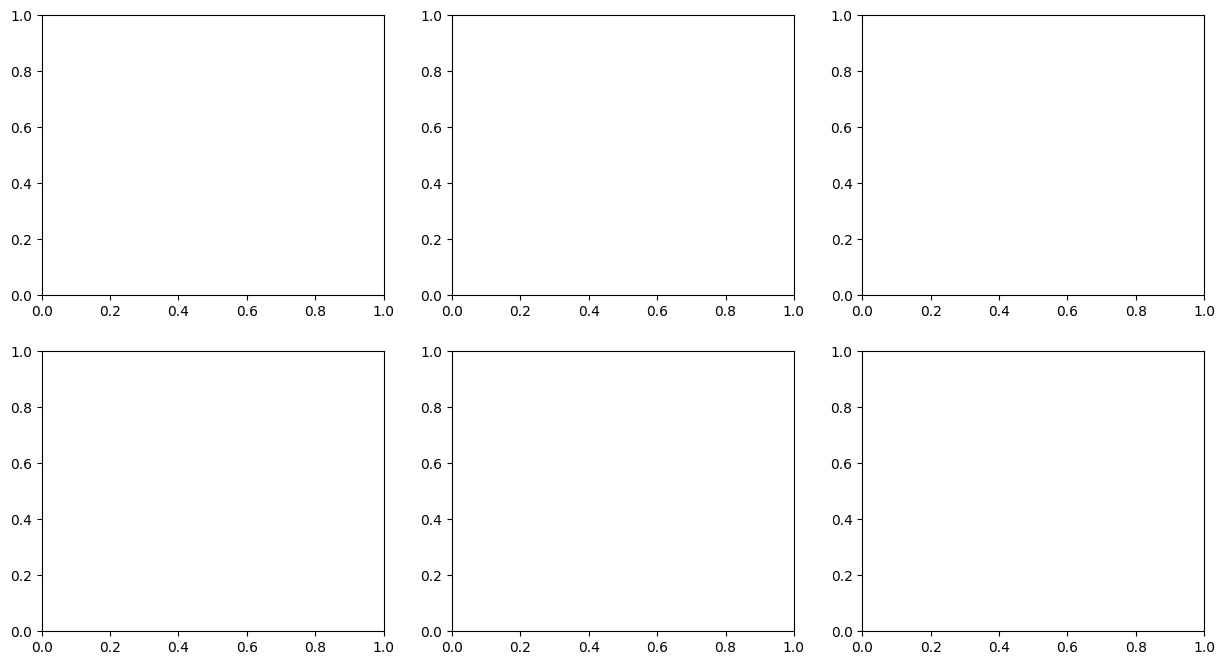

In [25]:
# Lista de colunas categóricas para analisar
categorias = [
    'gender',
        'PaymentMethod',
    'Contract',
    'InternetService',
    # adicione aqui outras colunas categóricas que façam sentido
]

# Mapeamento de nomes para rótulos amigáveis
rotulos_amigaveis = {
    'genero': 'Gênero',
    'faixa_etaria': 'Faixa Etária',
    'plano': 'Plano Contratado',
    'forma_pagamento': 'Forma de Pagamento',
    'tempo_cliente_categoria': 'Tempo como Cliente'
}

# Tamanho da grade
n_cols = 3
n_rows = -(-len(categorias) // n_cols)  # arredonda pra cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, coluna in enumerate(categorias):
    ax = axes[i]

    # Calcula proporção de cancelamento por categoria
    prop = df.groupby(coluna)['cancelou'].mean().sort_values(ascending=False) * 100

    # Cria gráfico de barras
    sns.barplot(
        x=prop.index,
        y=prop.values,
        palette='coolwarm',
        ax=ax
    )

    # Adiciona % no topo das barras
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

    # Títulos e labels
    ax.set_title(f'Cancelamento por {rotulos_amigaveis.get(coluna, coluna)}')
    ax.set_ylabel('% Cancelados')
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Remove eixos vazios se tiver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#📄Relatorio Final